# CS 171 Homework 1

In this homework assignment, you will use the concepts of linear regression introduced in class to fit a curve to a data set.

**Import the modules for this notebook**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In the western United States, rockfish are an important species. Each year, fish trawls are conducted to assess the length, age, and maturity of different species of rockfish.
The data can be read in as follows:

In [45]:
df = pd.read_csv('rockfish_data.csv')

We can take a look at the first few rows of the data frame as follows:

In [46]:
df.head()

,date,length,age,maturity,stage
0,9/2/2003,31,10,Immature,1.0
1,10/7/2002,32,6,Immature,1.0
2,7/18/2000,32,11,Immature,1.0
3,6/11/2001,32,11,Immature,2.0
4,8/8/2000,32,13,Immature,2.0


As we can see, this data set contains the lengths and ages of rockfish caught in trawl surveys.

**The Problem**

A representative from the National Oceanic and Atmospheric Association's Fisheries Center has come to you to determine length limits for rock fish - the small length a fish needs to be to safely remove it from the ocean. Biologists indicate that rockfish less than 20 years old should not be removed from the ocean in order to maintain the fishery stocks. They would like you to look into the data to determine the approximate length for a 20-year-old rock fish.

From a review of the literature, you find that some studies estimate the age of rockfish based on the following formula:

$$
A(l) = a_0 + a_1 (l - 30)^2
$$

In this formula, $A$ is the age of the fish, $l$ is its length, $a_0$ is a constant that represents the age of fish with a length of 30 cm, and $a_1$ is a quadratic growth coefficient that describes how the fish's age scales with its length. We can represent this model in the following formula:

In [47]:
def age_model(length_data, a_0, a_1):
    model = a_0 + a_1*(length_data-30)**2
    return(model)

## Problem 1.1
To get familiar with the data, begin by making a plot of the raw data. In addition, formulate an initial guess for the coefficients $a_0$ and $a_1$ and plot them on the graph along with the data.

In [48]:
# estimate the coefficients a_0 and a_1
# hint: it may help to generate the plot of the raw data below
#       and then return to this cell to estimate the coefficients
a_0 = 5.0
a_1 = 0.05

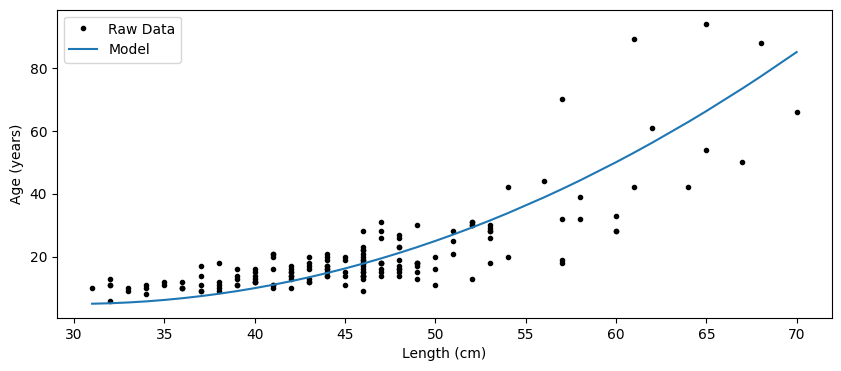

In [49]:
# make a figure object
fig = plt.figure(figsize=(10,4))

# plot the raw data 
plt.plot(df['length'], df['age'], 'k.', label='Raw Data')

# plt the model curve with your guess for the coefficient
# uncomment after providing your first guess for a_0 and a_1 in the previous cell
plt.plot(df['length'], age_model(df['length'], a_0, a_1), label='Model')

# format the axes and show the plot
plt.xlabel('Length (cm)')
plt.ylabel('Age (years)')
plt.legend()
plt.show()

## Problem 1.2

In order to formulate an algorithm to derive the coefficients $a_0$ and $a_1$, we're going to need a loss function and a way to minimize it. The Mean Square Error (MSE) loss function is suitable for this example and is given by

$$
\mathcal{L} = \frac{1}{N} \sum_{i=1}^N (A_{data} - A_{model})^2 = \frac{1}{N} \sum_{i=1}^N (A_{data} - (a_0 + a_1 (l - 30)^2))^2
$$

This can be written into a Python function as follows:

In [50]:
def mean_square_error(length_data, age_data, a_0, a_1):
    N = len(age_data)
    error = (1/N)*np.sum((age_data - age_model(length_data, a_0, a_1))**2)
    return(error)

Derive the gradients of the loss function with respect to $a_0$ and $a_1$. 

$
\dfrac{\partial L}{\partial a_0} = \frac{-2}{N} \sum_{i=1}^N (A_{data} - (a_0 + a_1(l - 30)^2))
$

$
\dfrac{\partial L}{\partial a_1} = \frac{-2}{N} \sum_{i=1}^N (A_{data} - (a_0 + a_1(l - 30)^2)) * (l - 30)^2
$

Next, write a `loss_gradient_function` to compute the gradients in your equations. The function should take in the arguments `length_data`, `age_data`, `a_0`, `a_1` and return an array of length 2 with the gradients.

In [51]:
# enter your function here
def loss_gradient_function(length_data, age_data, a_0, a_1):
    N = len(age_data)
    gradient_a0 = (-2/N) * np.sum(age_data - age_model(length_data, a_0, a_1))
    gradient_a1 = (-2/N) * np.sum((age_data - age_model(length_data, a_0, a_1)) * (length_data**2))
    return np.array([gradient_a0, gradient_a1])

## Problem 1.3

Implement a Python class called `RockfishSolver` that can be used to solve for the coefficients $a_0$ and $a_1$. The class should have an `__init__` function that takes in an initial guess for `a_0` and `a_1`, a learning rate, and an iteration count. The class should also have a `fit` function that takes in the length and age data, and iterates to solve for the coefficients $a_0$ and $a_1$ that yeild the lowest errors. The `fit` function should also keep track of the errors for each iteration.

In [52]:
# define your RockfishSolver class here
class RockfishSolver:

    def __init__(self, a_0, a_1, eta, n_iterations):
        self.a_0 = a_0
        self.a_1 = a_1
        self.eta = eta
        self.n_iterations = n_iterations
        self.losses = []

    def fit(self, length_data, age_data):
        for _ in range(self.n_iterations):
            gradients = loss_gradient_function(length_data, age_data, self.a_0, self.a_1)
            self.a_0 -= self.eta * gradients[0]
            self.a_1 -= self.eta * gradients[1]
            loss = mean_square_error(length_data, age_data, self.a_0, self.a_1)
            self.losses.append(loss)


## Problem 1.4

Use your Python class to solve for the coefficients given your initial guess.

Note: this problem is sensitive to the learning rate parameter. If your solution is "blowing up", then you may need to reduce your learning rate.

In [80]:
# define the parameters for the Python class
a_0 = 5.0
a_1 = 0.05
eta = 0.0000001
n_iterations = 100

# initiate the object
rs = RockfishSolver(a_0, a_1, eta, n_iterations)

# call the fit function on the object to solve for the coefficients
rs.fit(df['length'], df['age'])

Print out the coefficients solved for by your class:

In [81]:
print(f'a_0 = {rs.a_0}')
print(f'a_1 = {rs.a_1}')

a_0 = 5.000016318969111
a_1 = 0.04741620852455037


Repeat the plot you made above, but plot your model with your solved coefficients for $a_0$ and $a_1$.

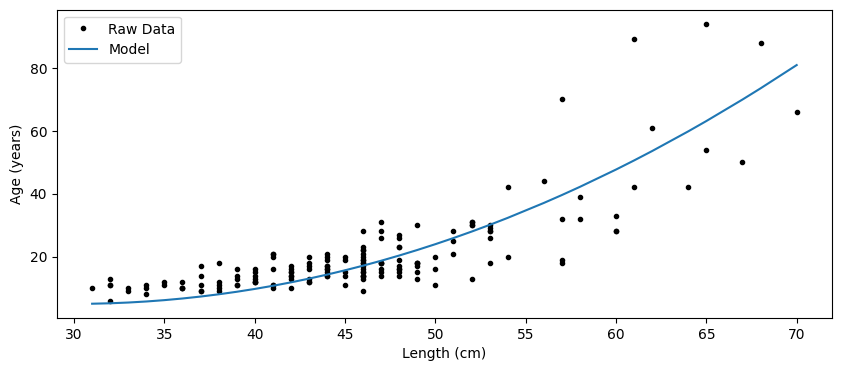

In [82]:
# make your plot here
# make a figure object
fig = plt.figure(figsize=(10,4))

# plot the raw data 
plt.plot(df['length'], df['age'], 'k.', label='Raw Data')

# plt the model curve with your guess for the coefficient
# uncomment after providing your first guess for a_0 and a_1 in the previous cell
plt.plot(df['length'], age_model(df['length'], rs.a_0, rs.a_1), label='Model')

# format the axes and show the plot
plt.xlabel('Length (cm)')
plt.ylabel('Age (years)')
plt.legend()
plt.show()

## Problem 1.5
In your class above, your fit function should have kept track of your model errors for each iteration. Make a plot of your errors as a function of iteration number.

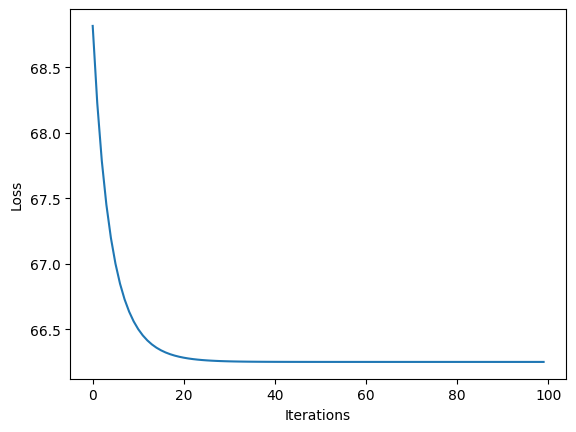

In [83]:
# make your plot here
plt.plot(rs.losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

Comment on the overall performance of the model and the errors. Does it seem that your model has converged, giving you the best estimate of the coefficients? If not, modify your code so that the model produces a better fit.

The model performed reasonably well, and the errors appeared to reduce consistently before plateauing around iteration 30. By iteration 50, the model has converged and given a good estimate of the coefficients.

## Problem 1.6

Using your optimized coefficients, estimate the length of a rockfish that is 20 years old to provide a length limit for fishing rockfish to NOAA's Fishery Center.

In [84]:
# estimate the length of a 20 year old fish from your model
length_20 = np.sqrt((20 - rs.a_0)/rs.a_1) + 30
print(f'The length of a 20 year old fish is estimated to be {length_20:.2f} cm.')

The length of a 20 year old fish is estimated to be 47.79 cm.
